# Laboratory Session - Exercise 02

 **Alice Pagano** - 1236916 
 
 *Padova, 22 April 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Index <a class="anchor" id="0"></a>

0. [Exercise 0 - Practice with discrete probability distributions](#00) <br> 
1. [Exercise 1 - Concentration of a contaminant in tap water](#1) <br>    
2. [Exercise 2 - Waiting time in minutes at the doctor](#2) <br> 
3. [Exercise 3 - Typo error in a book](#3) <br>
4. [Exercise 4 - Deck of 52 cards](#4) <br>
5. [Exercise 5 - All mayors currently in charge in the Italian mayors working in local towns in Italy](#5) <br>


##  Exercise 0 - Practice with discrete probability distributions <a class="anchor" id="00"></a>
* [Index](#0)

The probability of obtaining 5 heads after 10 trials is: P( 5 | 10 )= 0.2050781

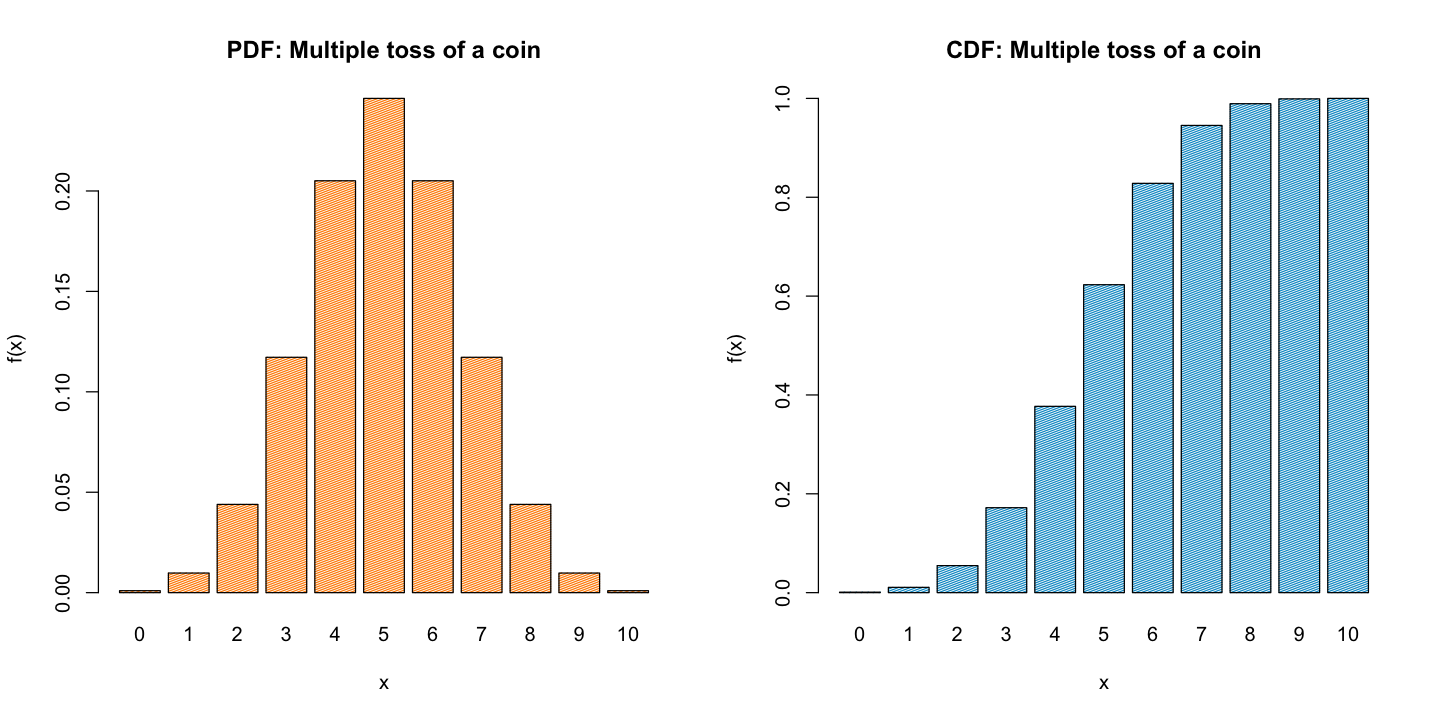

In [2]:
layout(matrix(c(1,1,2,2), nrow = 2, ncol = 2, byrow = TRUE))

# Multiple toss of a coin 
x <- 0:10
n_trials <- 10
p <- 1/2 

n <- 5 # Number of heads 

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

# Probability density binomial distribution
db <- dbinom(x, n_trials, p)

barplot(db, names=x, col='darkorange', xlab='x', ylab='f(x)', density=60, 
        main="PDF: Multiple toss of a coin")

cat("The probability of obtaining", n, "heads after", n_trials, "trials is: ")
cat("P(",n,"|",n_trials,")=", db[n])

# Cumulative density binomial distribution
pb <- pbinom(x,n_trials,p)

barplot(pb, names=x, col='deepskyblue3', xlab='x', ylab='f(x)', density=60, 
        main="CDF: Multiple toss of a coin")

## Exercise 1 - Concentration of a contaminant in tap water  <a class="anchor" id="1"></a>
* [Index](#0)

In [3]:
# Create table 
x <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

In [4]:
# Evaluate the expected value and the variance for both methods
exp1 <- sum(x*p1)
var1 <- sum( (x-exp1)**2*p1 )

exp2 <- sum(x*p2)
var2 <- sum( (x-exp2)**2*p2 )

cat("p1\t")
cat("Expected value:\t", exp1, "\tVariance:", var1)
cat("\n")
cat("p2\t")
cat("Expected value:\t", exp2, "\tVariance:", var2)

p1	Expected value:	 15.959 	Variance: 0.033979
p2	Expected value:	 15.9622 	Variance: 0.02816716

## Exercise 2 - Waiting time  in minutes at the doctor  <a class="anchor" id="2"></a>
* [Index](#0)

The probability that a person will wait for less than 10 minutes is: P(X<10) = 0.2834687 

Theorical: 	exp= 30 	var= 900 
Simulation: 	exp= 27.31371 	var= 508.567 
Difference: 	exp= 2.686293 	var= 391.433 

The expected theorical value can be calculated also by manipulating the distribution.
The result is:  30 

The probability that a person will wait for more than 1 hour is: P(X>60) = 0.1353353 


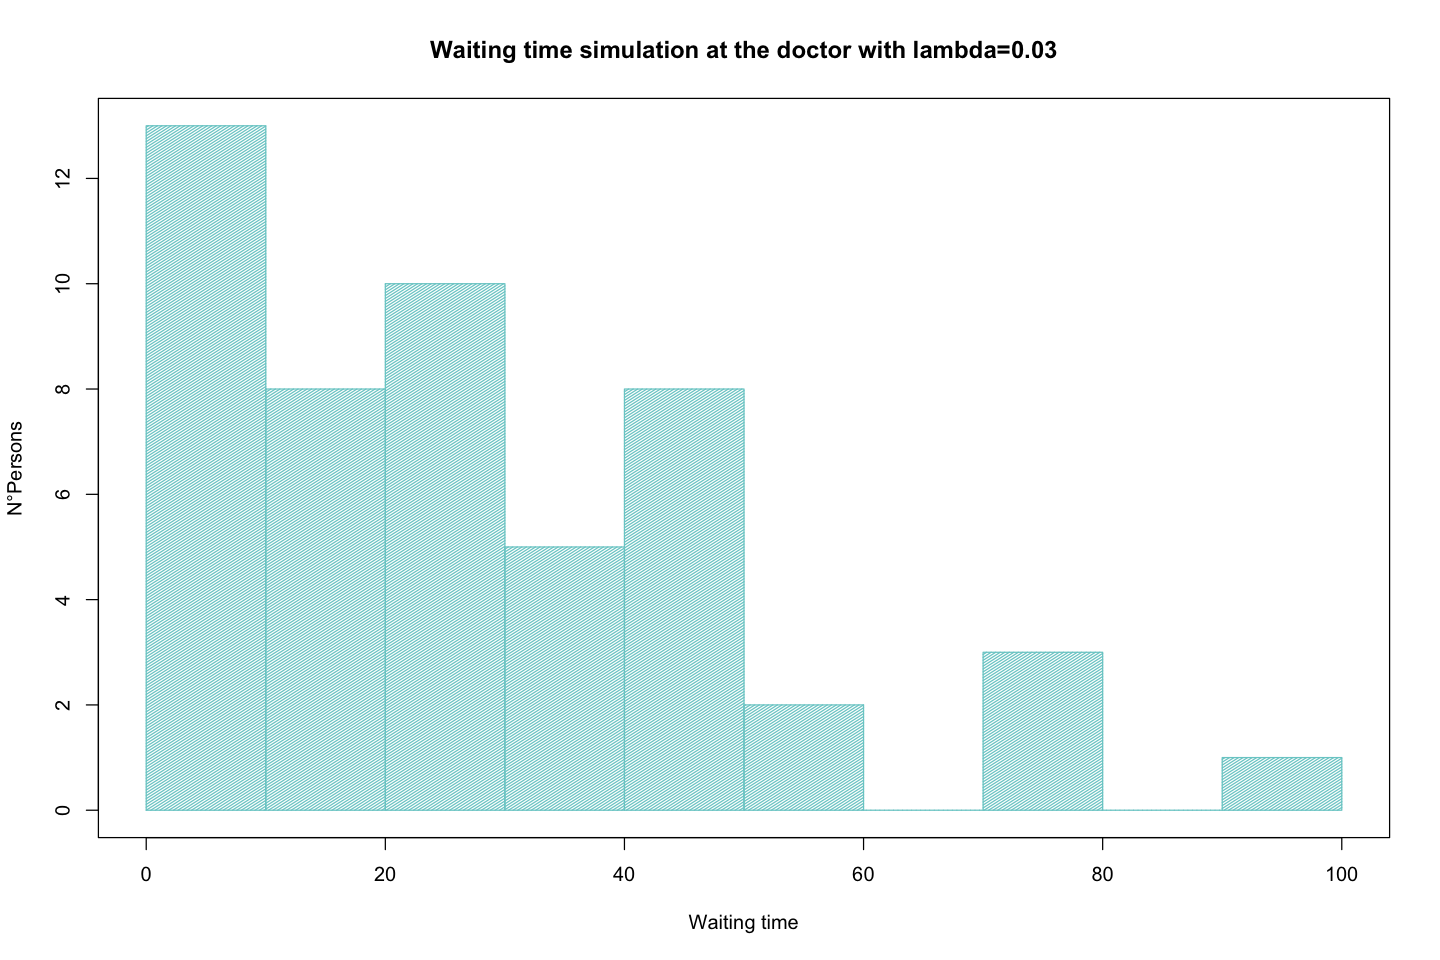

In [5]:
# A 
# Exponential Distribution with lambda=1/30
lambda <- 1/30
n = 1:50
x <- rexp(n, lambda)

options(repr.plot.width=12, repr.plot.height=8)

hist(x, xlab='Waiting time', ylab='N°Persons',
main = sprintf("Waiting time simulation at the doctor with lambda=%.2f",lambda), density=70, col="darkslategray3")
box()

# B
cat("The probability that a person will wait for less than 10 minutes is: ")
cat("P(X<10) =", pexp(10,lambda),"\n\n")

# C
exp.th <- 1/lambda # Theorical expected value
var.th <- 1/(lambda**2) # Theorical variance
exp.sim <- mean(x) # Expected value for simulated data
var.sim <- sd(x)**2 # Variance for simulated data

cat("Theorical: \texp=", exp.th, "\tvar=", var.th,"\n")
cat("Simulation: \texp=", exp.sim, "\tvar=", var.sim,"\n")
cat("Difference: \texp=", abs(exp.th-exp.sim), "\tvar=", abs(var.th-var.sim),"\n\n")

cat("The expected theorical value can be calculated also by manipulating the distribution.")
exp.dexp <- integrate(function(x){x*dexp(x,lambda)}, lower=0, upper=Inf)$value
cat("\nThe result is: ", exp.dexp,"\n\n")

# D
cat("The probability that a person will wait for more than 1 hour is: ")
cat("P(X>60) =", 1-pexp(60,lambda),"\n")


## Exercise 3 - Typo error in a book  <a class="anchor" id="3"></a>
* [Index](#0)

The probability that there is at least one error on a specific page of the book
is: P(>=1|lambda) = 0.2834687 



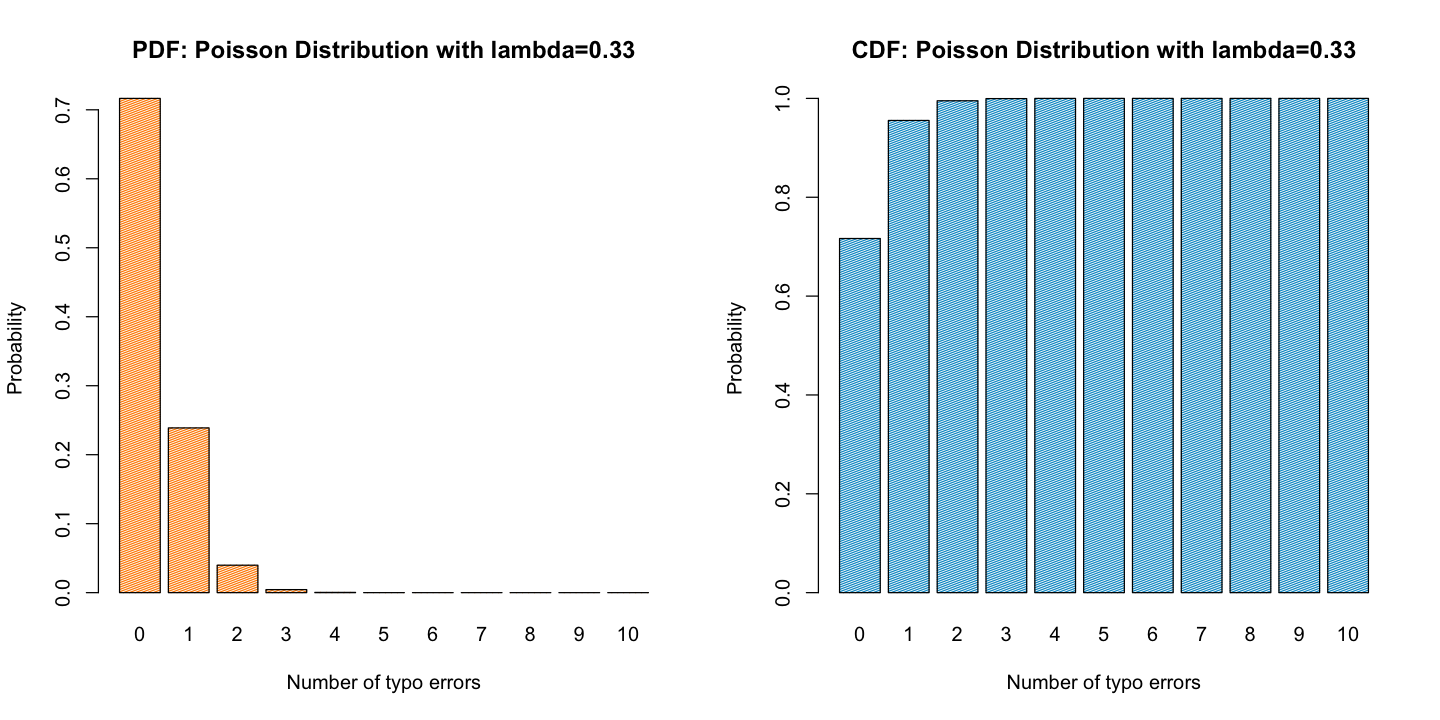

In [6]:
# Poisson Distribution with lambda=1/3
lambda <- 1/3
x <- 0:10

par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

dpois <- dpois(x,lambda) 

barplot(dpois, names=x, col='darkorange', xlab='Number of typo errors', ylab='Probability', density=60, 
        main=sprintf("PDF: Poisson Distribution with lambda=%.2f",lambda))


cat("The probability that there is at least one error on a specific page of the book
is: ")
cat("P(>=1|lambda) =", 1-dpois[1],"\n\n")


ppois <- ppois(x,lambda) 

barplot(ppois, names=x, col='deepskyblue3', xlab='Number of typo errors', ylab='Probability', density=60, 
        main=sprintf("CDF: Poisson Distribution with lambda=%.2f",lambda))


## Exercise 4 - Deck of 52 cards  <a class="anchor" id="4"></a>
* [Index](#0)

The probability that, at least in 10 draws, one ace is drawn is:P(X>=10,r=1) = 0.4865652 



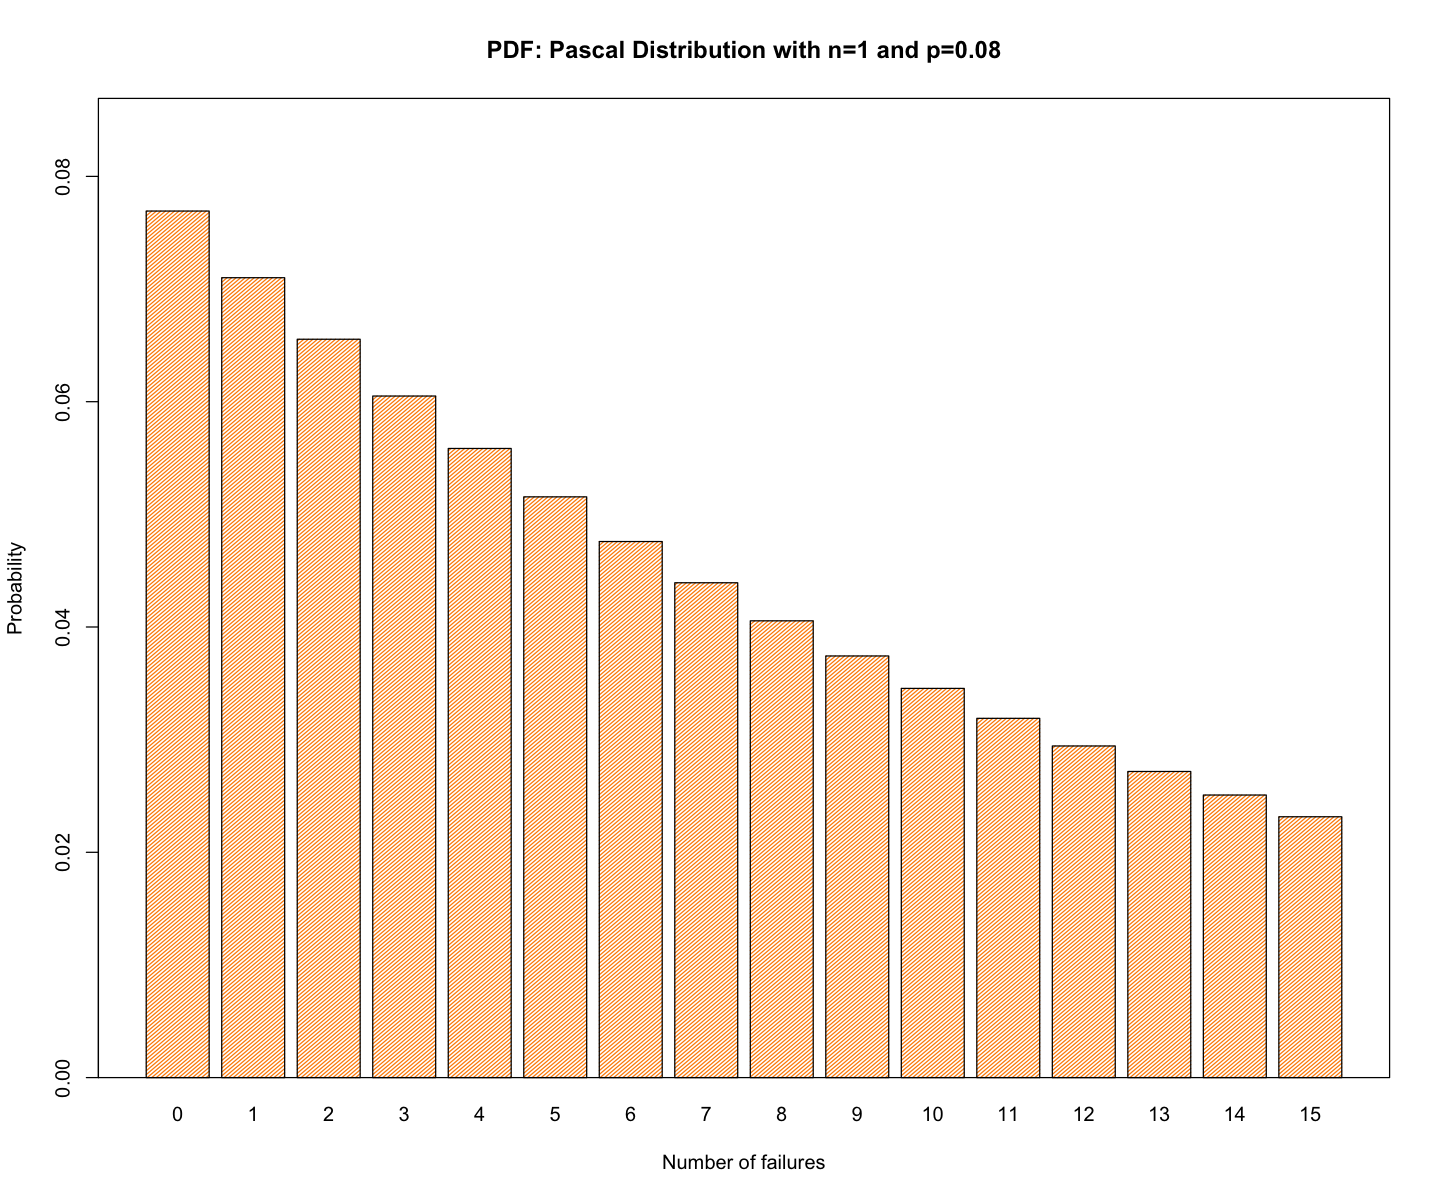

In [7]:
# Pascal Distribution 
p <- 4/52 # Probability of obtaining one ace
x <- 0:15 # Number of failures
n <- 1 # Times of successes

p.ace <- dnbinom(x,n,p) # Compute the probability distribution

cat("The probability that, at least in 10 draws, one ace is drawn is:")
cat("P(X>=10,r=1) =", 1-sum(p.ace[1:9]),"\n\n")

options(repr.plot.width=12, repr.plot.height=10)

barplot(p.ace, names=x, col='darkorange', xlab='Number of failures', ylab='Probability', density=70, 
        main=sprintf("PDF: Pascal Distribution with n=%.i and p=%.2f",n,p), ylim=c(0,max(p.ace)+0.01))
box()

## Exercise 5 - All mayors currently in charge in the Italian mayors working in local towns in Italy  <a class="anchor" id="5"></a>
* [Index](#0)

In [8]:
# Read the data
data <- read.csv2("sindaciincarica.csv", skip=2)

head(data)

codice_regione codice_provincia codice_comune denominazione_comune
1 1              2                10            ACQUI TERME         
2 1              2                20            ALBERA LIGURE       
3 1              2                30            ALESSANDRIA         
4 1              2                40            ALFIANO NATTA       
5 1              2                50            ALICE BEL COLLE     
6 1              2                62            ALLUVIONI PIOVERA   
  sigla_provincia popolazione_censita titolo_accademico cognome               
1 AL              20054                                 LUCCHINI              
2 AL                329                                 LOVOTTI               
3 AL              89411               PROF              CUTTICA DI REVIGLIASCO
4 AL                754                                 ZEGLIO                
5 AL                774               ARCH              MARTINO               
6 AL               1791                                 BETTI                 
  nome               sesso data_nascita luogo_nascita         
1 LORENZO GIUSEPPE   M     18/08/1963   REGNO UNITO           
2 RENATO             M     23/12/1946   ROCCHETTA LIGURE (AL) 
3 GIANFRANCO         M     30/06/1957   TORINO (TO)           
4 SABRINA            F     31/03/1971   TORINO (TO)           
5 GIANFRANCO         M     09/08/1972   ACQUI TERME (AL)      
6 GIUSEPPE FRANCESCO M     08/02/1953   ALLUVIONI CAMBIO' (AL)
  descrizione_carica data_elezione data_entrata_in_carica
1 Sindaco            11/06/2017    26/06/2017            
2 Sindaco            26/05/2019    27/05/2019            
3 Sindaco            11/06/2017    27/06/2017            
4 Sindaco            26/05/2019    27/05/2019            
5 Sindaco            11/06/2017    11/06/2017            
6 Sindaco            10/06/2018    11/06/2018            
  partito                                                                                            
1 MOVIMENTO 5 STELLE.IT                                                                              
2 LISTA CIVICA: INSIEME PER ALBERA                                                                   
3 FRATELLI D'ITALIA - ALLEANZA NAZIONALE | FORZA ITALIA | LEGA NORD | LISTA CIVICA: SIAMO ALESSANDRIA
4 LISTA CIVICA: INSIEME PER IL FUTURO                                                                
5 LISTA CIVICA: UNITI PER CRESCERE                                                                   
6 LISTA CIVICA: PIU' FORTI INSIEME                                                                   
  titolo_studio                                     
1 LAUREA  BREVE                                     
2 TITOLI O DIPLOMI PROFESSIONALI POST LIC.ELEMENTARE
3 LAUREA                                            
4 LAUREA                                            
5 LAUREA                                            
6                                                   
  professione                                                                                               
1 SPECIALISTI E TECNICI NELLE SCIENZE DELLA SALUTE E ADDETTI A SERVIZI SANITARI                             
2 PERSONE RITIRATE DAL LAVORO                                                                               
3 PROFESSORI DI SCUOLA SECONDARIA SUPERIORE E ASSIMILATI                                                    
4 AVVOCATI E PROCURATORI LEGALI                                                                             
5 IMPIEGATI DI AMMINISTRAZIONI, ORGANI ED ENTI PUBBLICI (NON RICOMPRESI IN ALTRE SPECIFICHE CLASSIFICAZIONI)
6

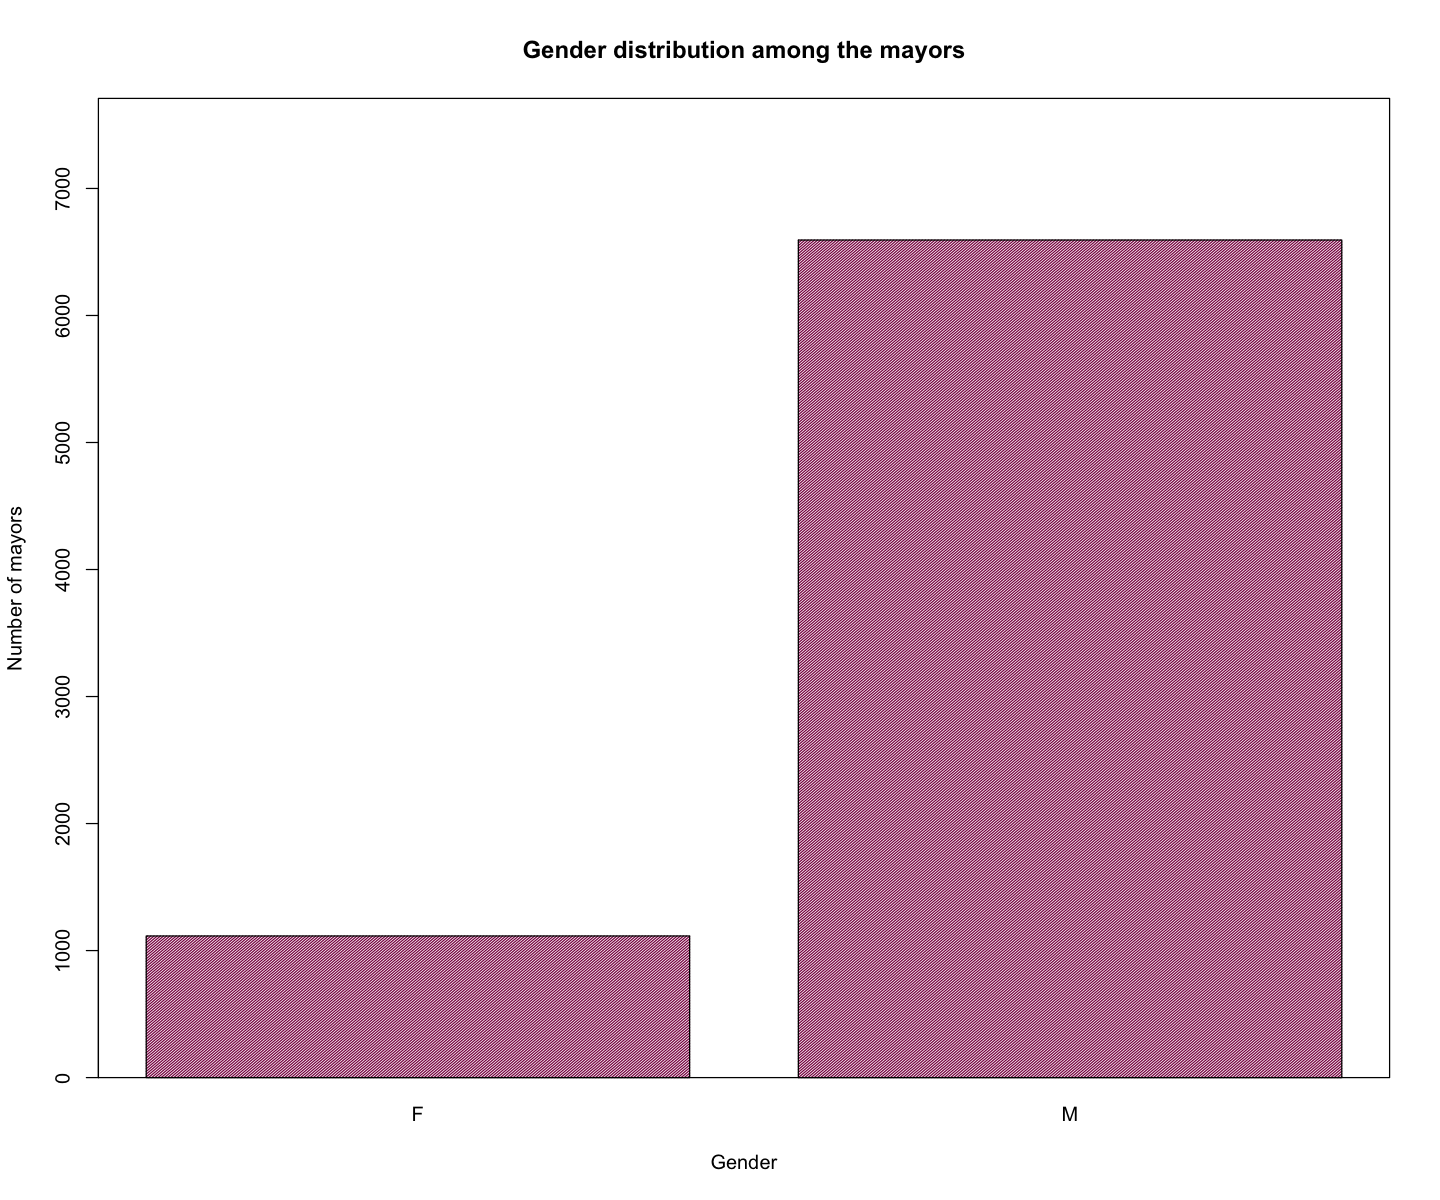

In [9]:
# Plot the gender distribution among the mayors
options(repr.plot.width=12, repr.plot.height=10)
plot(data$sesso, col='deeppink4', xlab='Gender', ylab='Number of mayors', density=100, 
        main="Gender distribution among the mayors", ylim=c(0,dim(data)[1]))
box()


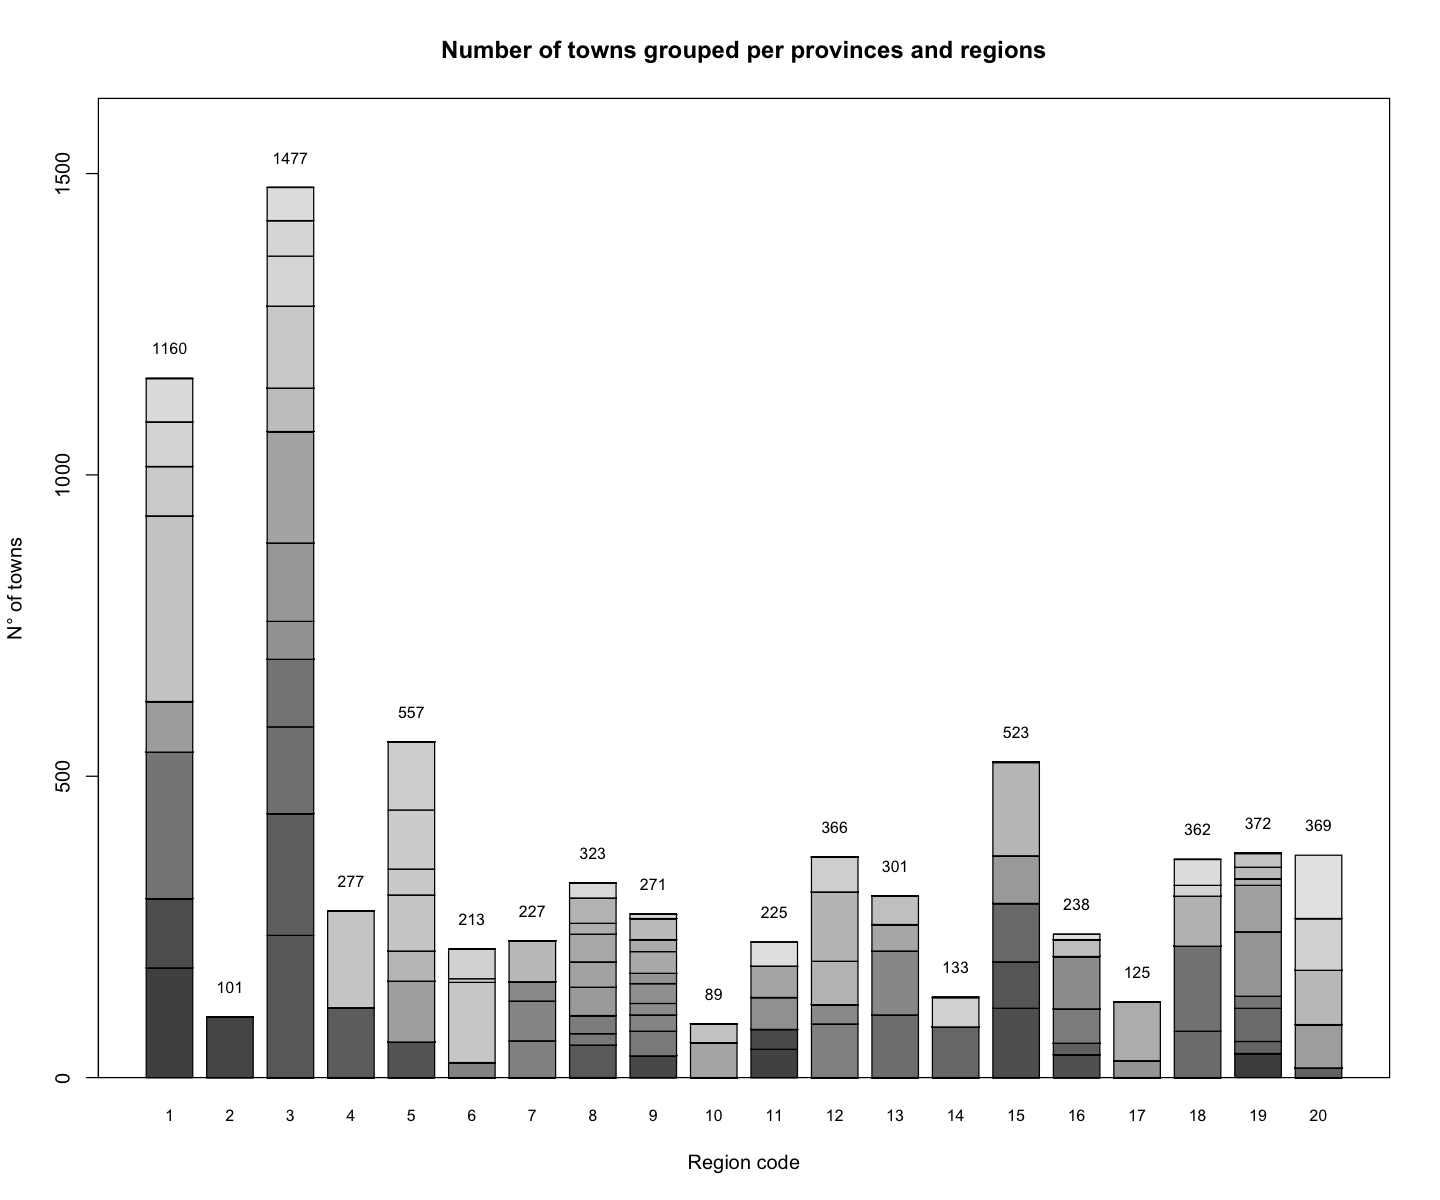

In [10]:
# Plot the number of towns grouped per provinces and per regions
options(repr.plot.width=12, repr.plot.height=10)

#Group the towns per provinces and per regions
data.table <- table(data$codice_provincia,data$codice_regione)

ylim = c(0,1.1*max(margin.table(data.table,2)))
labels = as.vector(margin.table(data.table,2))

bb <- barplot(data.table, names=unique(data$codice_regione), space=0.3, xlab="Region code",
         main = "Number of towns grouped per provinces and regions", ylab="N° of towns",
             cex.names = 0.8, ylim=ylim)
text(bb, labels+50, labels=labels, cex=.8, col="black")
box()

In [11]:
# Import package required for time difference
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



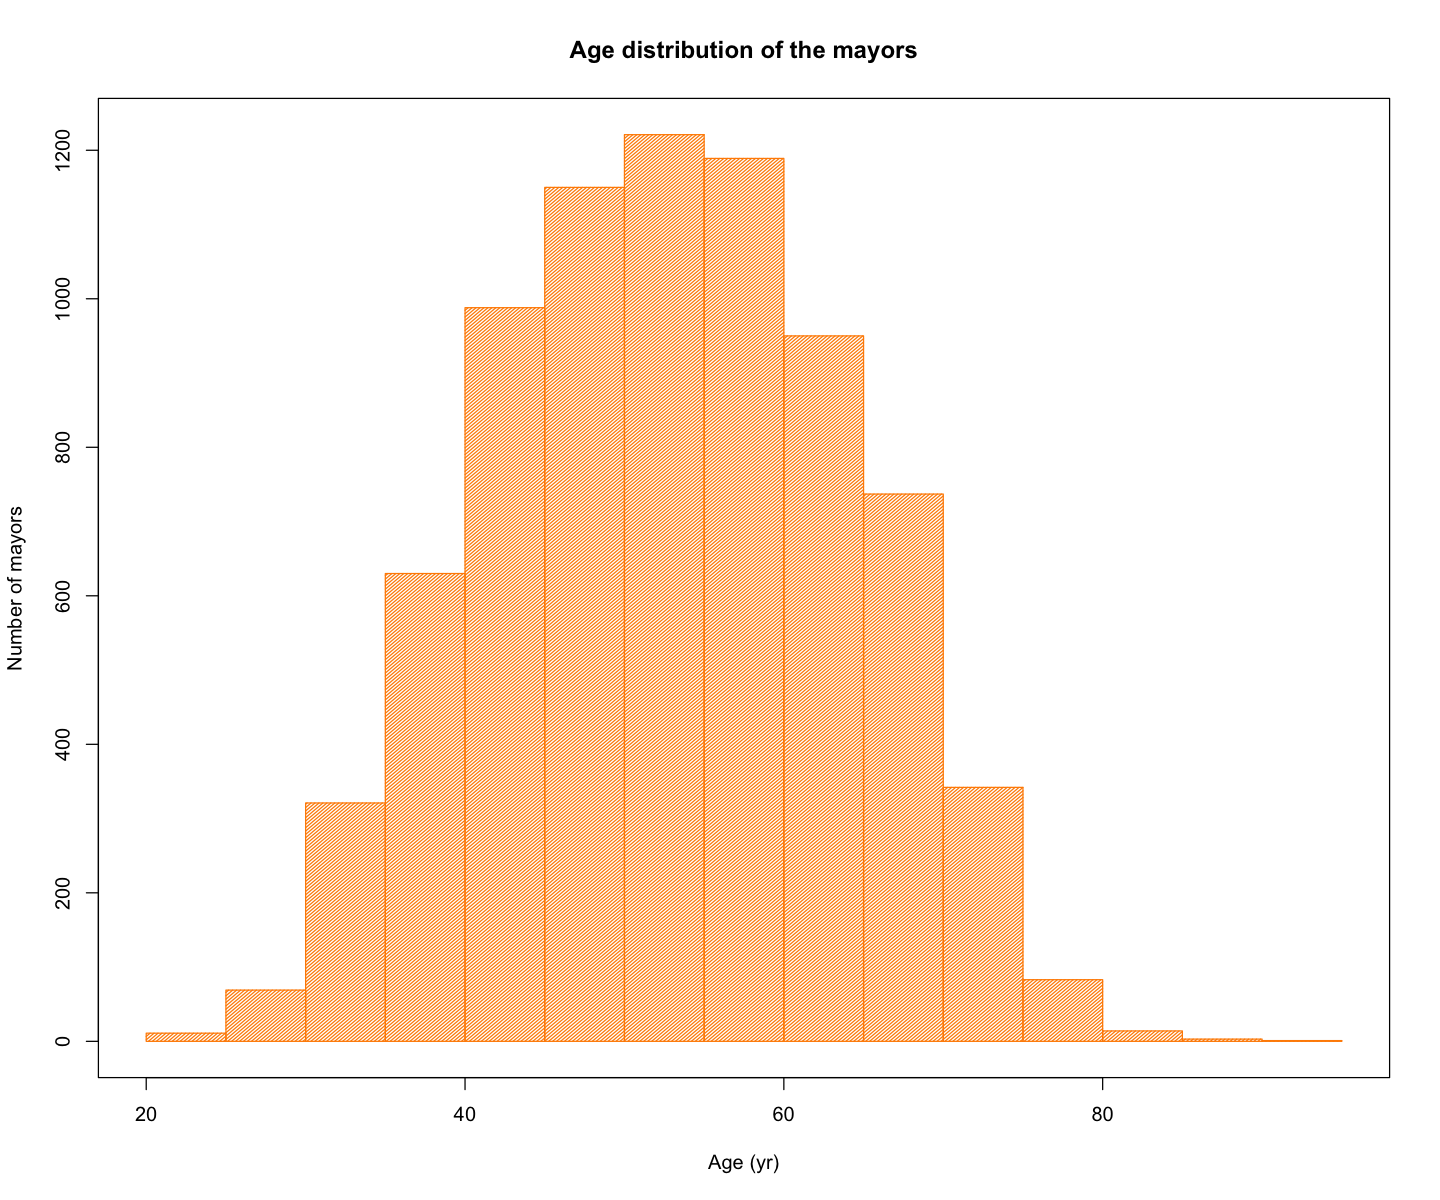

In [12]:
# Convert data_nascita column to datetime in R
data["data_nascita"] <- as.Date(data$data_nascita,format='%d/%m/%Y')

# Take today date 
today <- as.Date(Sys.Date(), format='%d/%m/%Y') 

# Add a column with the age (years) of the mayors
data <- mutate("anni"=round(time_length(difftime(today,data$data_nascita), "years")),data)

# Plot a distribution of the age (years) of the mayors
options(repr.plot.width=12, repr.plot.height=10)
hist(data$anni, col='darkorange', xlab='Age (yr)', ylab='Number of mayors', density=80, 
        main="Age distribution of the mayors")
box()

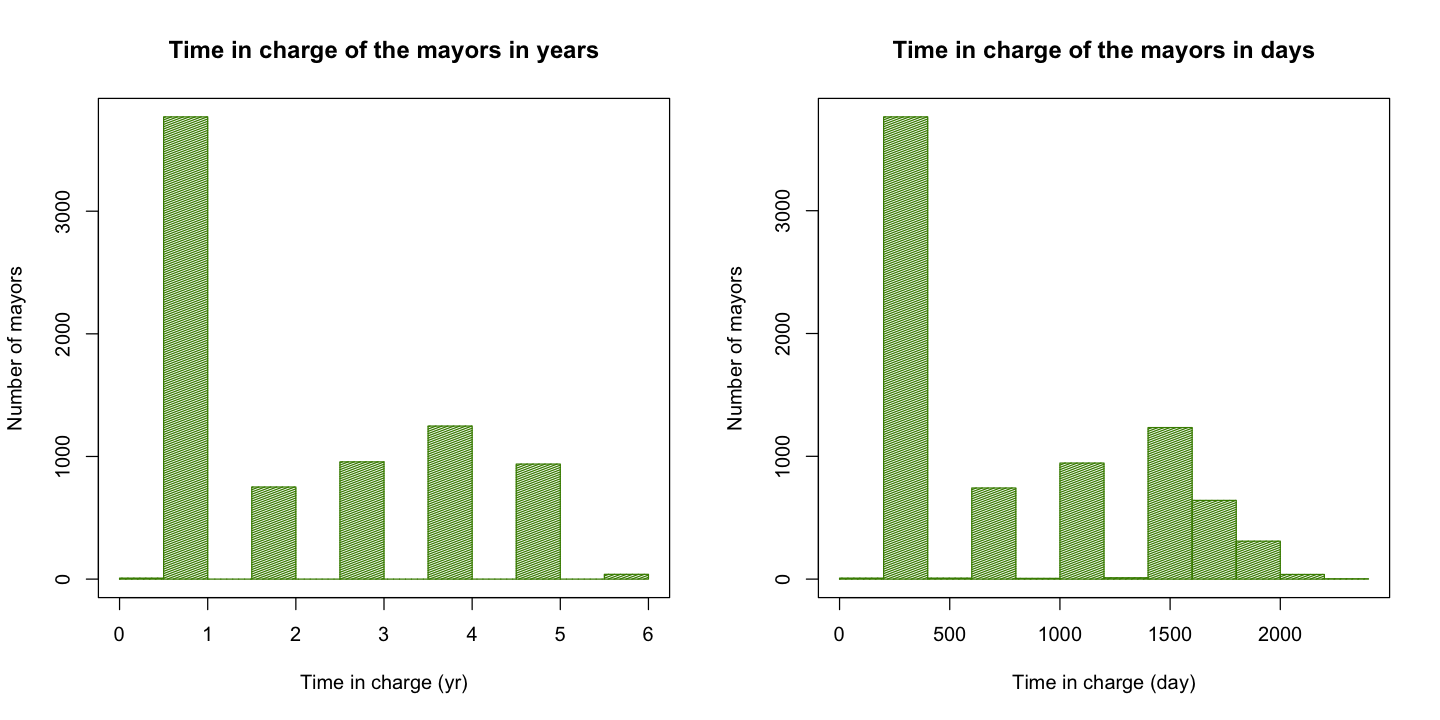

In [13]:
# Convert data_elezione column to datetime in R
data["data_elezione"] <- as.Date(data$data_elezione,format='%d/%m/%Y')

today <- as.Date(Sys.Date(), format='%d/%m/%Y')

data.yr <- mutate("anni_carica"=round(time_length(difftime(today,data$data_elezione), "years")),data)

# Plot a distribution of the time the mayor is in charge
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)
hist(data.yr$anni_carica, col='chartreuse4', xlab='Time in charge (yr)', ylab='Number of mayors', density=60, 
        main="Time in charge of the mayors in years")
box()

data.day <- mutate("anni_carica"=round(time_length(difftime(today,data$data_elezione), "days")),data)

hist(data.day$anni_carica, col='chartreuse4', xlab='Time in charge (day)', ylab='Number of mayors', density=60, 
        main="Time in charge of the mayors in days")
box()


In [14]:
# Compute the year of election plus 5 years
complete.year <- year(data$data_elezione) + 5

cat("Number of mayors that are going to complete their mandate \n")
# Take the number of mayors that are going to complete their mandate in 2020
cat("in 2020: ", length(complete.year[complete.year==2020]), "\n")
# Take the number of mayors that are going to complete their mandate in 2021
cat("in 2021: ", length(complete.year[complete.year==2021]), "\n")

cat("Total number of mayors:", dim(data)[1])

Number of mayors that are going to complete their mandate 
in 2020:  943 
in 2021:  1245 
Total number of mayors: 7709